O método do trapézio é um método numérico simples, utilizado para obter a área sob uma curva. Dado o intervalo de integração, a área é obtida ao considerar a função $f(x)$ aplicada em dois pontos como sendo as bases do trapézio, e a diferença entre os pontos como a altura da figura geométrica. O método do trapézio é composto quando o intervalo estabelecido é particionado em $n$ fragmentos, e quanto maior for o particionamento, melhor é a aproximação da área, visto que as arestas do trapézio que interceptam a curva se ajustarão melhor à ela.

O método do trapézio simples é

$$\int_{a}^{b} f(x) \approx \frac{h}{2} (f(a)+f(b))$$

O método do trapézio composto é

$$\int_{a}^{b} f(x) \approx \sum_{i=0}^{n-1} \frac{h}{2} (f(x_i)+f(x_{i+1}))$$

A integral que modela o comprimento de uma chapa com formato ondulatório senoidal é

$$\int_{0}^{48} \sqrt {1+cos^2(x)}dx$$

O método do trapézio será a solução numérica aplicada para estimar o comprimento desta chapa no intervalo definido.

In [1]:
# Importações

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def funcao(x):
    return np.sqrt(1+np.cos(x)**2)

In [13]:
# Aplicação da aproximação pelo Método do Trapézio

def metodo_trapezio(f, x_i, x_f, h):    
    
    particao = np.linspace(x_i, x_f, h)

    lista_y = []
    lista_trapezio = []

    for i in range(len(particao)):
        y = f(particao[i])
        lista_y.append(y)

    for j, k in zip(range(len(particao)-1), range(len(lista_y)-1)):
        valor = (lista_y[k+1] + lista_y[k]) * (particao[j+1] - particao[j])/2
        lista_trapezio.append(valor)

    area_sob_curva = sum(lista_trapezio)
    print('Área obtida pelo método aplicado manualmente:', area_sob_curva)
    
    # Testando com a função .trapz da biblioteca numpy que aplica o método do trapézio
    # Para comparar com a área sob a curva pelo método aplicado manualmente
    
    area = np.trapz(lista_y, particao)
    print('Área obtida pelo método ao aplicar a função da biblioteca numpy:', area)
     
    # Representação gráfica

    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(particao, lista_y)
    plt.title('Representação gráfica da função aproximada')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(particao, lista_y)
    for i in range(len(particao)):
        j+=1
        vertical = plt.plot([particao[i], particao[i]], [particao[0], lista_y[i]], color='#E50000', linestyle='--')
    while j < len(particao):
        vertical = plt.plot([particao[i+j], particao[i+j]], [particao[0], lista_y[i+j]], color='#E50000', linestyle='--')
    plt.plot([particao[-1], particao[-1]], [particao[0], funcao(x_f)], color='#E50000', linestyle='--')
    plt.xlim(x_i-2, x_f+2)
    plt.ylim(min(lista_y)-0.05, max(lista_y)+0.05)
    plt.title('Representação gráfica do método')
    plt.grid()
    plt.show()
    
    return area_sob_curva

Área obtida pelo método aplicado manualmente: 62.43737140065479
Área obtida pelo método ao aplicar a função da biblioteca numpy: 62.43737140065479


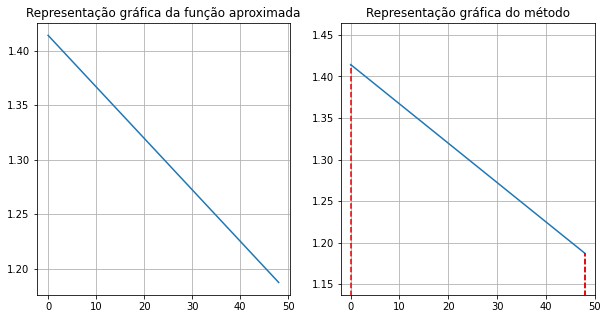

Área obtida pelo método aplicado manualmente: 56.443750676177466
Área obtida pelo método ao aplicar a função da biblioteca numpy: 56.443750676177466


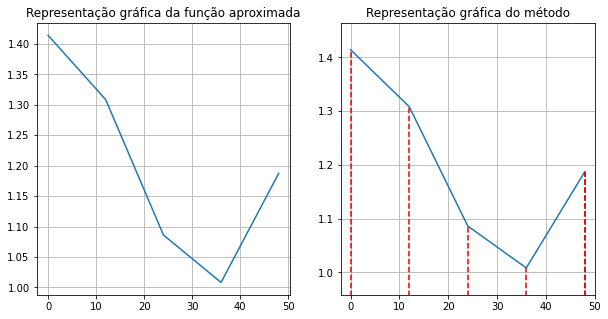

O erro cometido para o método do trapézio simples em relação ao método do trapézio composto é:
 5.993620724477324


In [14]:
media_ts = metodo_trapezio(funcao, 0, 48, 2)
media_tc = metodo_trapezio(funcao, 0, 48, 5)
erro = abs(media_ts-media_tc)
print('O erro cometido para o método do trapézio simples em relação ao método do trapézio composto é:\n', erro)

Área obtida pelo método aplicado manualmente: 58.43593721927541
Área obtida pelo método ao aplicar a função da biblioteca numpy: 58.43593721927542


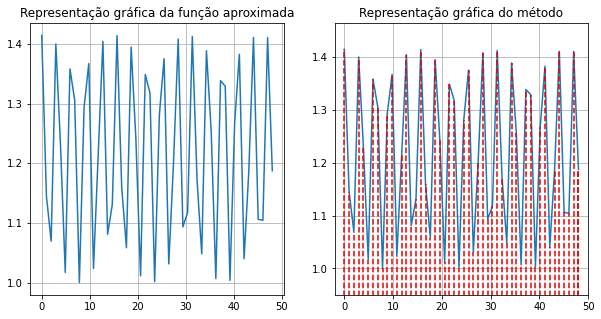

58.43593721927541

In [15]:
# Aplicação para mais pontos no intervalo

metodo_trapezio(funcao, 0, 48, 50)

Área obtida pelo método aplicado manualmente: 6.021989137904907
Área obtida pelo método ao aplicar a função da biblioteca numpy: 6.021989137904908


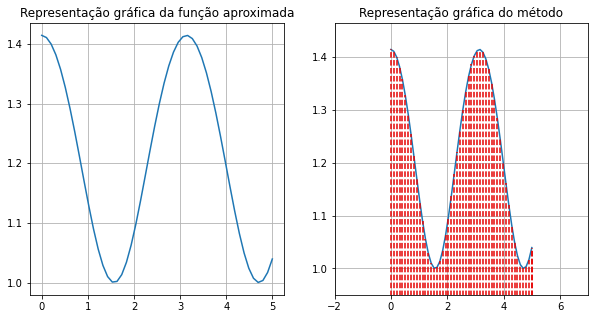

6.021989137904907

In [16]:
# Aplicação no intervalo reduzido

metodo_trapezio(funcao, 0, 5, 50)

Assim, para uma chapa de formato ondulatório senoidal, a função é melhor aproximada ao aplicar o método do trapézio composto. O melhor ajuste para a função pode ser obtido ao aumentar a quantidade de pontos no intervalo ou reduzir a extensão do próprio intervalo.